# Map detected galaxies after 15, 20, 25 years

###  Chiara Mingarelli,  mingarelli@gmail.com, simulation curves from J. A. Ellis

In [1]:
#!/usr/bin/env python
from __future__ import division
import sys, os
import math
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos, sin, log10
import healpy as hp
import plot_mpl2
import collections
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [4]:
# simulated CW curves (white noise)
sim1a = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.05_T_15.txt") # 2sigma, DP=0.95, 15 yrs
sim2b = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.05_T_20.txt") # 2sigma, DP=0.95, 20 yrs
sim3c = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.05_T_25.txt") # 2sigma, DP=0.95, 25 yrs

sim1d = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.003_T_15.txt") # 3sigma, DP=0.95, 15 yrs
sim2e = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.003_T_20.txt") # 3sigma, DP=0.95, 20 yrs
sim3f = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.003_T_25.txt") # 3sigma, DP=0.95, 25 yrs

sim1g = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.0001_T_15.txt") # 1e-4, DP=0.95, 15 yrs
sim2h = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.0001_T_20.txt") # 1e-4, DP=0.95, 20 yrs
sim3i = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.0001_T_25.txt") # 1e-4, DP=0.95, 25 yrs

In [5]:
# simulated frequency and strain
simStrain1 = sim1a[:,1] # 15 yrs, 0 red noise, 2sigma
simFreq1 = sim1a[:,0]
simStrain2 = sim2b[:,1] # 20 yrs, 0 red noise, 2sigma
simFreq2 = sim2b[:,0]
simStrain3 = sim3c[:,1] # 25 yrs, 0 red noise, 2sigma
simFreq3 = sim3c[:,0]

simStrain4 = sim1d[:,1] # 15 yrs, 0 red noise, 3 sigma
simFreq4 = sim1d[:,0]
simStrain5 = sim2e[:,1] # 20 yrs, 0 red noise, 3 sigma
simFreq5 = sim2e[:,0]
simStrain6 = sim3f[:,1] # 25 yrs, 0 red noise, 3 sigma
simFreq6 = sim3f[:,0]

simStrain7 = sim1g[:,1] # 15 yrs, 0 red noise, 1e-4
simFreq7 = sim1g[:,0]
simStrain8 = sim2h[:,1] # 20 yrs, 0 red noise, 1e-4
simFreq8 = sim2h[:,0]
simStrain9 = sim3i[:,1] # 25 yrs, 0 red noise, 1e-4
simFreq9 = sim3i[:,0]



In [7]:
# all realizations
files = []

for i in os.listdir('../../rusty_data/MM13_Reg/test01/'):
    if i.endswith('_test'):
        files.append(i)

In [8]:
len(files)

10000

In [33]:
# RA_tot, DEC_tot, gw_freq_vec, strain_vec, mchirp_rec, q_rec, gal_cat_name, dist_list, mstar_list, save_p, 
# gal_choice, T_z_list, mergRate_list, t2c_list, z_list, r_inf_list, friction_list, hardening_list, num_zeros

In [9]:
# simulated CW curves (red noise right now)
Rsim1a = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.05_T_15.txt") # 2sigma, DP=0.95, 15 yrs
Rsim2b = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.05_T_20.txt") # 2sigma, DP=0.95, 20 yrs
Rsim3c = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.05_T_25.txt") # 2sigma, DP=0.95, 25 yrs

Rsim1d = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.003_T_15.txt") # 3sigma, DP=0.95, 15 yrs
Rsim2e = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.003_T_20.txt") # 3sigma, DP=0.95, 20 yrs
Rsim3f = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.003_T_25.txt") # 3sigma, DP=0.95, 25 yrs

Rsim1g = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.0001_T_15.txt") # 1e-4, DP=0.95, 15 yrs
Rsim2h = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.0001_T_20.txt") # 1e-4, DP=0.95, 20 yrs
Rsim3i = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.0001_T_25.txt") # 1e-4, DP=0.95, 25 yrs

# simulated frequency and strain
RsimStrain1 = Rsim1a[:,1] # 15 yrs, 0 red noise, 2sigma
RsimFreq1 = Rsim1a[:,0]
RsimStrain2 = Rsim2b[:,1] # 20 yrs, 0 red noise, 2sigma
RsimFreq2 = Rsim2b[:,0]
RsimStrain3 = Rsim3c[:,1] # 25 yrs, 0 red noise, 2sigma
RsimFreq3 = Rsim3c[:,0]

RsimStrain4 = Rsim1d[:,1] # 15 yrs, 0 red noise, 3 sigma
RsimFreq4 = Rsim1d[:,0]
RsimStrain5 = Rsim2e[:,1] # 20 yrs, 0 red noise, 3 sigma
RsimFreq5 = Rsim2e[:,0]
RsimStrain6 = Rsim3f[:,1] # 25 yrs, 0 red noise, 3 sigma
RsimFreq6 = Rsim3f[:,0]

RsimStrain7 = Rsim1g[:,1] # 15 yrs, 0 red noise, 1e-4
RsimFreq7 = Rsim1g[:,0]
RsimStrain8 = Rsim2h[:,1] # 20 yrs, 0 red noise, 1e-4
RsimFreq8 = Rsim2h[:,0]
RsimStrain9 = Rsim3i[:,1] # 25 yrs, 0 red noise, 1e-4
RsimFreq9 = Rsim3i[:,0]


In [11]:
# points for one sky

allF = []
allS = []
allMc = []
allQ = []
allPi = []
allLum = []
all_name = []
allD = []

# condensed here for an exmple realization
allFile = np.genfromtxt("../../codes/example_sky/herc_1249_test_2017-02-28-16:05:40_10.txt", usecols=(2,3,4,5,7,8,9))
allF.append(allFile[:,0])
allS.append(allFile[:,1])
allMc.append(allFile[:,2])
allQ.append(allFile[:,3])
allD.append(allFile[:,4])
allLum.append(allFile[:,5]) 
allPi.append(allFile[:,6])
all_name.append(np.genfromtxt("../../codes/example_sky/herc_1249_test_2017-02-28-16:05:40_10.txt", usecols=(6), dtype = None))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


In [12]:
allF = np.array(allF)
allF.shape

(1, 87)

# Which sources can be detected with simulated IPTA curves?


In [13]:
# Sources above curve?

In [14]:
def find_nearest(array,value):
    # http://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array
    idx = (np.abs(array-value)).argmin()
    return idx #return index of array

In [15]:
# New sims used below

In [16]:
# Sources detected the most timesd ("Hit List")

In [17]:
def find_detected_sr(simFreq,simStrain):
    iptaDetectedF = []
    iptaDetectedS = []
    iptaDetectedN = []
    iptaDetectedMc = []
    iptaDetectedQ = []
    iptaDetectedPi = []
    iptaDetectedLum = []
    iptaDetectedDist = []

    for i in range(1):
        for j in range(len(allF[i])):
            compareFreq = find_nearest(simFreq, allF[i][j]) # find the closest freq in inteprolated values to source freq, report index
            simStrainX = simStrain[compareFreq] # what is the strain of that source?
            if allS[i][j] > simStrainX: # can we detect that source?
                iptaDetectedF.append(allF[i][j]) # add it to a detected list
                iptaDetectedS.append(allS[i][j]) 
                iptaDetectedN.append(all_name[i][j]) 
                iptaDetectedMc.append(allMc[i][j]) 
                iptaDetectedQ.append(allQ[i][j]) 
                iptaDetectedPi.append(allPi[i][j]) 
                iptaDetectedLum.append(allLum[i][j]) 
                iptaDetectedDist.append(allD[i][j])
    return iptaDetectedF, iptaDetectedS, iptaDetectedN, iptaDetectedMc, iptaDetectedQ, iptaDetectedPi, iptaDetectedLum, iptaDetectedDist

In [19]:
# source sky

sim_sky_all = np.genfromtxt("../../codes/example_sky/herc_1249_test_2017-02-28-16:05:40_10.txt")
RA_tot_all = sim_sky_all[:,0] #phi, add pi to this for healpix maps
DEC_tot_all = sim_sky_all[:,1] #theta
freq_all = sim_sky_all[:,2]
strain_vec_all = sim_sky_all[:,3]
file_size_all = strain_vec_all.size # number of galaxies in file


In [20]:
# 15 yrs white noise,  2 sigma
iptaDetectedF, iptaDetectedS, iptaDetectedN, iptaDetectedMc, iptaDetectedQ, iptaDetectedPi, iptaDetectedLum, \
iptaDetectedDist = find_detected_sr(simFreq1,simStrain1)

# 15 yrs white noise,  3 sigma
iptaDetectedF4, iptaDetectedS4, iptaDetectedN4, iptaDetectedMc4, iptaDetectedQ4, iptaDetectedPi4, iptaDetectedLum4, \
iptaDetectedDist4 = find_detected_sr(simFreq4,simStrain4)
            
# 15 yrs white noise, 1e-4 sigma
iptaDetectedF7, iptaDetectedS7, iptaDetectedN7, iptaDetectedMc7, iptaDetectedQ7, iptaDetectedPi7, iptaDetectedLum7, \
iptaDetectedDist7 = find_detected_sr(simFreq7,simStrain7)

In [21]:
# 20 yrs white noise, 2 sigma
iptaDetectedF2, iptaDetectedS2, iptaDetectedN2, iptaDetectedMc2, iptaDetectedQ2, iptaDetectedPi2, iptaDetectedLum2, \
iptaDetectedDist2 = find_detected_sr(simFreq2,simStrain2)
                        
# 20 yrs white noise, 3 sigma
iptaDetectedF5, iptaDetectedS5, iptaDetectedN5, iptaDetectedMc5, iptaDetectedQ5, iptaDetectedPi5, iptaDetectedLum5, \
iptaDetectedDist5 = find_detected_sr(simFreq5,simStrain5)
        
# 20 yrs white noise, 1e-4 sigma
iptaDetectedF8, iptaDetectedS8, iptaDetectedN8, iptaDetectedMc8, iptaDetectedQ8, iptaDetectedPi8, iptaDetectedLum8, \
iptaDetectedDist8 = find_detected_sr(simFreq8,simStrain8)

In [22]:
# 25 yrs white noise, 2 sigma
iptaDetectedF3, iptaDetectedS3, iptaDetectedN3, iptaDetectedMc3, iptaDetectedQ3, iptaDetectedPi3, iptaDetectedLum3, \
iptaDetectedDist3 = find_detected_sr(simFreq3,simStrain3)
        
# 25 yrs white noise, 3 sigma
iptaDetectedF6, iptaDetectedS6, iptaDetectedN6, iptaDetectedMc6, iptaDetectedQ6, iptaDetectedPi6, iptaDetectedLum6, \
iptaDetectedDist6 = find_detected_sr(simFreq6,simStrain6)
            
# 25 yrs white noise, 1e-4 sigma
iptaDetectedF9, iptaDetectedS9, iptaDetectedN9, iptaDetectedMc9, iptaDetectedQ9, iptaDetectedPi9, iptaDetectedLum9, \
iptaDetectedDist9 = find_detected_sr(simFreq9,simStrain9)


In [23]:
# 25 yrs white noise, 3 sigma
iptaDetectedF6, iptaDetectedS6, iptaDetectedN6, iptaDetectedMc6, iptaDetectedQ6, iptaDetectedPi6, iptaDetectedLum6, \
iptaDetectedDist6 = find_detected_sr(simFreq6,simStrain6)

In [24]:
# 25 yrs RED noise, 3 sigma
RiptaDetectedF6, RiptaDetectedS6, RiptaDetectedN6, RiptaDetectedMc6, RiptaDetectedQ6, RiptaDetectedPi6, RiptaDetectedLum6, \
RiptaDetectedDist6 = find_detected_sr(RsimFreq6,RsimStrain6)

In [25]:
RiptaDetectedF1, RiptaDetectedS1, RiptaDetectedN1, RiptaDetectedMc1, RiptaDetectedQ1, RiptaDetectedPi1, RiptaDetectedLum1, \
RiptaDetectedDist1 = find_detected_sr(RsimFreq1,RsimStrain1)

In [26]:
RiptaDetectedF2, RiptaDetectedS2, RiptaDetectedN2, RiptaDetectedMc2, RiptaDetectedQ2, RiptaDetectedPi2, RiptaDetectedLum2, \
RiptaDetectedDist2 = find_detected_sr(RsimFreq2,RsimStrain2)

In [27]:
RiptaDetectedF3, RiptaDetectedS3, RiptaDetectedN3, RiptaDetectedMc3, RiptaDetectedQ3, RiptaDetectedPi3, RiptaDetectedLum3, \
RiptaDetectedDist3 = find_detected_sr(RsimFreq3,RsimStrain3)

# PLOTTING AND SORTING LISTS OF GALAXIES

In [28]:
#Example: How to ask how many times a galaxy was found, with NGC 4486

In [29]:
catalog_list = iptaDetectedN6

In [30]:
histo_data = dict((x, catalog_list.count(x)) for x in catalog_list)
d= histo_data


In [31]:
d.get('NGC4486a')

In [32]:
histo_data

{b'NGC4373': 1, b'NGC4472': 1}

In [33]:
# try using a sorted list

In [34]:
histo_data = sorted(histo_data.items(), key=lambda x:x[1]) # sort histogram by count


In [35]:
value = np.zeros([len(histo_data)])
label = []

for j in range(len(histo_data)):
    value[j] = histo_data[j][1]
    label.append(histo_data[j][0])

In [36]:
def find_gal_idx_4val(nameList, val):
    ans = [i for i, x in enumerate(nameList) if x >= val]
    return ans

In [37]:
value = value.tolist()

In [38]:
# What is the minimum number of counts we are interested in for plotting?
minval = 150
goodCounts = find_gal_idx_4val(value, minval)

In [39]:
goodCounts

[]

In [40]:
toPlot_val = value[goodCounts[0]:goodCounts[-1]+1]
toPlot_name = label[goodCounts[0]:goodCounts[-1]+1]

IndexError: list index out of range

In [41]:
toPlot_name 

NameError: name 'toPlot_name' is not defined

In [42]:
# RED NOISE SOURCES

In [43]:
X = np.arange(len(toPlot_val))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(X, toPlot_val, alpha=0.8, linewidth = 0.4, color = "C1")
ax.set_yticks(X)
plt.setp(ax.get_yticklabels(), fontsize=7)
ax.set_yticklabels(toPlot_name)
majorLocator = MultipleLocator(4)
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
#plt.xticks(np.arange(0,))
plt.xlabel("Count")
#plt.title("25 year dataset, FAP $3\sigma$, DP$=95\%$, Red Noise")
#plt.ylabel("Galaxy Name")
plt.tight_layout()
#plt.savefig("RN_histList_3sigma.pdf")

NameError: name 'toPlot_val' is not defined

# PLOTTING FOR WHITE NOISE SOURCES

In [44]:
X = np.arange(len(toPlot_val))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(X, toPlot_val, alpha=0.8, linewidth = 0.4)
ax.set_yticks(X)
plt.setp(ax.get_yticklabels(), fontsize=6)
ax.set_yticklabels(toPlot_name)
majorLocator = MultipleLocator(300)
minorLocator = MultipleLocator(150)
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
#plt.xticks(np.arange(0,))
plt.xlabel("Count")
#plt.title("25 year dataset, FAP $3\sigma$, DP$=95\%$, White Noise")
#plt.ylabel("Galaxy Name")
plt.tight_layout()
#plt.savefig("WN_3sigma_20Mar17.pdf")

NameError: name 'toPlot_val' is not defined

In [73]:
# plotting preamble (credit J. Ellis)

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

In [74]:
# detected sky realizations
sky_file = np.genfromtxt("../detectedSkies/hercules_skies/herc_final_detected_skiesWskyPos.txt",dtype=None)

OSError: ../detectedSkies/hercules_skies/herc_final_detected_skiesWskyPos.txt not found.

In [75]:
detF = []
detS = []
for ii in range(len(sky_file)):
    detF.append(sky_file[ii][5])
    detS.append(sky_file[ii][6])

NameError: name 'sky_file' is not defined

In [76]:
# read in sensitivity curve. This is an upper limit curve, not a detection curve, needs to be updated
dataSB_W = np.genfromtxt("SensWhole.dat",skip_header=1)#, dtype=float, sep="  ")

OSError: SensWhole.dat not found.

In [77]:
newF = []
newS = []

In [78]:
for j in range(len(allF)):
    newF.append(allF[j])
    newS.append(allS[j])

In [79]:
flatF = [item for sublist in newF for item in sublist]
flatS = [item for sublist in newS for item in sublist]

In [80]:
flatF[0]

4.03716019915e-09

# Comment and uncomment to make different FAP curves

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

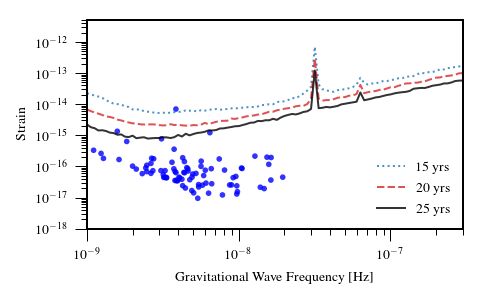

In [81]:
fig = plt.figure()
ax = plt.subplot(111)
plt.scatter(flatF, flatS, edgecolors='none', color='blue', alpha=0.8, s=8, rasterized=True) #skies

#plt.loglog(dataSB_W[:,0], dataSB_W[:, 1], color ='black') #sensitivity
#plt.loglog(dataSB_W[:,0], dataSB_W[:, 1], color ='black', label = 'Current EPTA') #sensitivity
# EPTA is really 7-18 yrs baselines up to 2014; Desvignes et al 2016

#plt.loglog(RsimFreq1,RsimStrain1,  label='15 yrs', lw = 1, linestyle = ":", color = 'C0',alpha = 0.8)#2sigma
#plt.loglog(simFreq4,simStrain4,  label='15 yrs', lw = 1, linestyle = ":", color = 'C0', alpha = 0.8)
plt.loglog(simFreq7,simStrain7,  label='15 yrs', lw = 1, linestyle = ":", color = 'C0', alpha = 0.8)


#plt.loglog(RsimFreq2,RsimStrain2,  label='20 yrs', lw = 1, linestyle = "--", color = 'C3',alpha = 0.8)#2sigma
#plt.loglog(simFreq5,simStrain5,  label='20 yrs', lw = 1, linestyle = "--", color = 'C3', alpha = 0.8)
plt.loglog(simFreq8,simStrain8,  label='20 yrs', lw = 1, linestyle = "--", color = 'C3', alpha = 0.8)


#plt.loglog(RsimFreq3,RsimStrain3,  label='25 yrs', lw = 1, linestyle = "-",  color = 'black',alpha = 0.8) #2sigma
#plt.loglog(simFreq6,simStrain6,  label='25 yrs', lw = 1, linestyle = "-", color = 'black', alpha = 0.8)
#plt.loglog(simFreq9,simStrain9,  label='25 yrs', lw = 1, linestyle = "-", color = 'black', alpha = 0.8) #1e-4
plt.loglog(simFreq6,simStrain6,  label='25 yrs', lw = 1, linestyle = "-", color = 'black', alpha = 0.8)


plt.xlim(1e-9,3e-7)
plt.ylim(1e-18, 5e-12)
plt.xlabel("Gravitational Wave Frequency [Hz]")
plt.ylabel("Strain")
plt.tight_layout() 
#ax.legend(frameon = False, loc = "lower right")
#plt.title("Time to detection, 95$\%$ detection probability")
plt.legend(frameon=False,loc=4)
#plt.savefig("single_1e-4_predictions_WN.pdf", dpi=400, bbox_inches='tight')

#color = '#1f77b4' (blue) , '#ff7f0e' (orange), '#2ca02c' (green), '#d62728' (red), #9467bd (purple)

In [82]:

len(iptaDetectedF9)/len(RiptaDetectedF9)

NameError: name 'RiptaDetectedF9' is not defined

# Histograms for 25 yr detected skies

In [83]:
def find_gal_idx(nameList, name):
    ans = [i for i, x in enumerate(nameList) if x == name]
    return ans

def find_gal_dec_idx(nameList, dec):
    ans = [i for i, x in enumerate(nameList) if x >= dec]
    return ans

def find_gal_dec_idx_neg(nameList, dec):
    ans = [i for i, x in enumerate(nameList) if x <= dec]
    return ans

def hist_weight(lst):
    return np.ones_like(lst)/len(lst)

def auto_bin(bin_size, min_edge, max_edge):
    #bin_size = 0.05; min_edge = -3.5; max_edge = -1
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    return bin_list

In [84]:
#iptaDetectedF9, iptaDetectedS9, iptaDetectedMc9,iptaDetectedQ9,iptaDetectedPi9,iptaDetectedLum9, iptaDetectedDist9)

rn_proj = np.loadtxt("../detectedSkies/future_proj/RN4e-16_25yr_DP95_FAP1e-4_detected.txt")

OSError: ../detectedSkies/future_proj/RN4e-16_25yr_DP95_FAP1e-4_detected.txt not found.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anacond

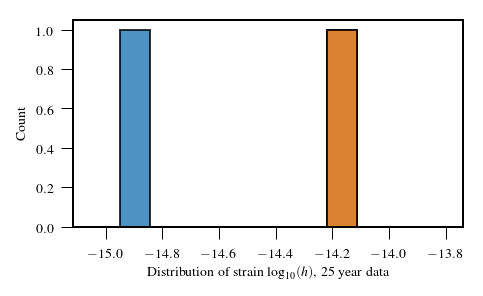

In [85]:
bin_list = auto_bin(0.1,-15,-13.75)
#weights1 = hist_weight(np.log10(iptaDetectedS6))
#weights2 = hist_weight(np.log10(RiptaDetectedS6))
plt.hist(np.log10(iptaDetectedS6),bin_list, align='left',  alpha=0.8, edgecolor = 'black', \
         label = "white noise", color = "C0")
plt.hist(np.log10(RiptaDetectedS6),bin_list, align='left',  alpha=0.8, edgecolor = 'black', \
         label = "red noise", color = "C1")
#plt.xlim(-9.7,-7.7)
plt.xlabel(r"Distribution of strain $\log_{10}(h)$, 25 year data")
#plt.ylabel("Probability")
plt.ylabel("Count")
#plt.legend(frameon=False)
plt.tight_layout()
#plt.savefig("det_h_WhiteRed_3sigma_95_20Mar17_NoNorm.pdf")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anacond

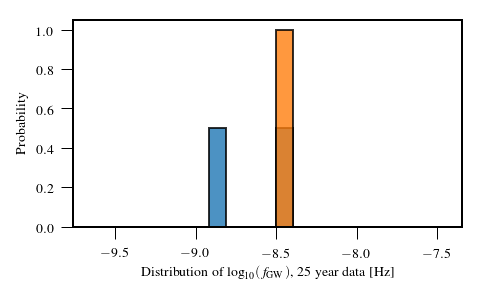

In [86]:
# What is the distribution of frequencies where sources were detected?
bin_list = auto_bin(0.1,-9.6,-7.4)
weights1 = hist_weight(np.log10(iptaDetectedF6))
weights2 = hist_weight(np.log10(RiptaDetectedF6))
plt.hist(np.log10(iptaDetectedF6),bin_list, align='left',  alpha=0.8, edgecolor = 'black', \
         weights = weights1 , label = "white noise")
plt.hist(np.log10(RiptaDetectedF6),bin_list, align='left',  alpha=0.8, edgecolor = 'black', \
         weights = weights2 , label = "red noise")
#plt.xlim(-9.7,-7.7)
plt.xlabel(r"Distribution of $\log_{10}(f_\mathrm{GW})$, 25 year data [Hz]")
plt.ylabel("Probability")
#plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("det_gw_freqs_WhiteRed_3sigma_20Mar17.pdf")

In [87]:
max(mchirp_recLog2)

NameError: name 'mchirp_recLog2' is not defined

In [ ]:
mchirp_recLog2 = np.log10(RiptaDetectedMc6)
mchirp_recLog = np.log10(iptaDetectedMc6)

bin_list = auto_bin(.1,8.3,10.3)
weights1 = hist_weight(mchirp_recLog)
weights2 = hist_weight(mchirp_recLog2)

plt.hist(mchirp_recLog ,bin_list, align='left',  alpha=0.8, edgecolor = 'black', weights = weights1, \
        label = "white noise")
plt.hist(mchirp_recLog2 ,bin_list, align='left',  alpha=0.8, edgecolor = 'black', weights = weights2, \
        label = 'red noise')

plt.xlabel(r"Log Chirp Mass $\mathcal{M}_c$ $[M_\odot]$, 25 year data")
plt.ylabel("Probability")
#plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("det_chirp_WhiteRed_3sigma_20Mar17.pdf")


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
bin_list = auto_bin(.05,.2,1)
weights1 = hist_weight(iptaDetectedQ6)
weights2 = hist_weight(RiptaDetectedQ6)

plt.hist(iptaDetectedQ6,bin_list, alpha=0.8, edgecolor = 'black', align = 'left', weights = weights1,\
        label = "white noise")
plt.hist(RiptaDetectedQ6,bin_list, alpha=0.8, edgecolor = 'black', align = 'left', weights = weights2, \
        label= 'red noise')

plt.xlabel(r"Mass Ratio ($q$), 25 year dataset ")
plt.ylabel("Probability")
plt.xlim(0.2,1.0)
majorLocator = MultipleLocator(.25)
minorLocator = MultipleLocator(0.05)
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
#plt.legend(frameon=False)
plt.tight_layout()

#plt.savefig("mass_ratio_det_WhiteRed_3sigma_20Mar17.pdf")

In [ ]:
ax = fig.add_subplot(111)
bin_list = auto_bin(.1,-27,-24.9)
weights1 = hist_weight(iptaDetectedLum6)
weights2 = hist_weight(RiptaDetectedLum6)

plt.hist(iptaDetectedLum6,bin_list, alpha=0.8, edgecolor = 'black', align = 'left', weights = weights1)
plt.hist(RiptaDetectedLum6,bin_list, alpha=0.8, edgecolor = 'black', align = 'left', weights = weights2)
plt.xlim(-27,-24.9)
plt.ylabel("Probability")
plt.xlabel(r"2MASS K-band Luminosity ($M_K$), 25 year dataset ")
#plt.legend(frameon=False)
plt.tight_layout()
#plt.savefig("kLum_det_WhiteRed_3sigma_20March17.pdf")

In [ ]:
bin_list = auto_bin(5,10,220)
weights1 = hist_weight(iptaDetectedDist6)
weights2 = hist_weight(RiptaDetectedDist6)

ax = fig.add_subplot(111)
plt.hist(iptaDetectedDist6, bin_list, weights=weights1, alpha = 0.8, align='left', edgecolor = 'black',\
         label = "white noise")
plt.hist(RiptaDetectedDist6, bin_list, weights=weights2, alpha = 0.8, align='left', edgecolor = 'black', \
        label = "red noise")


majorLocator = MultipleLocator(25)
minorLocator = MultipleLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
plt.xlabel("Distance to Galaxy (Mpc), detected 25 year")
plt.ylabel("Probability")
plt.vlines(22,0,.08, colors='C3', linestyles='-.')
plt.vlines(108,0,.08,colors='C4', linestyles='-.')
plt.annotate('Virgo', (24,.07), color = 'C3')
plt.annotate('Coma', (111,.07), color = 'C4')

#plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("distance_5bins_WhiteRed_3sigma_20Mar17.pdf")